## Useful Gaussian Identities

#### Density Function
$$
\begin{eqnarray*}
f(x) &=& N(\mu,\Sigma)\\
& = & (2\pi)^{-\frac{d}{2}} \det(\Sigma)^{-\frac{1}{2}} \exp\left[-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu) \right]
\end{eqnarray*}
$$
Or in log form
$$
\log f(x) = -\frac{d}{2}\log(2\pi) - \frac{1}{2} \log\det(\Sigma) -\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu) 
$$

#### Linear Transformations
$$
X\sim N(\mu,\Sigma) \quad \Rightarrow \quad (AX+b)\sim N(A\mu + b, A\Sigma A^T)
$$

#### Block Definition of Joint Density
$$
\begin{eqnarray*}
f(x,y) = N\left(\left[\begin{array}{c}\mu_x\\ \mu_y\end{array}\right], \left[\begin{array}{cc}\Sigma_{xx} & \Sigma_{xy}\\ \Sigma_{xy}^T & \Sigma_{yy} \end{array}\right]\right)
\end{eqnarray*}
$$

#### Marginal Distributions
$$
\begin{eqnarray*}
f(x) = \int_{\Omega_y} f(x,y) dy = N(\mu_x, \Sigma_{xx})\\
\end{eqnarray*}
$$

#### Conditional Distributions
$$
f(x|y=\bar{y}) = N\left(\mu_x + \Sigma_{xy}\Sigma_{yy}^{-1}(\bar{y}-\mu_y), \Sigma_{xx} - \Sigma_{xy}\Sigma_{yy}^{-1}\Sigma_{xy}^T \right)
$$


In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## The Multivariate Gaussian Density Function

In [2]:
sigma = np.array([[1, 0.5],
                  [0.5, 1.0]])

print(sigma-sigma.T)

[[0. 0.]
 [0. 0.]]


In [3]:
mu = np.ones(2)

x = np.array([0.1,0.2])


d = mu.shape[0]

sign, log_det = np.linalg.slogdet(sigma)
part = np.linalg.solve(sigma, x-mu)
log_pdf = -0.5*np.log(2.0*np.pi) - 0.5*log_det - 0.5*(x-mu).T @ part

print(log_pdf)

-1.261764163645449


In [4]:

def LogGaussianDensity(x, mu, sigma):
    
    d = mu.shape[0]

    sign, log_det = np.linalg.slogdet(sigma)
    part = np.linalg.solve(sigma, x-mu)
    log_pdf = -0.5*np.log(2.0*np.pi) - 0.5*log_det - 0.5*(x-mu).T @ part
    
    return log_pdf


In [5]:
N = 80
x1s = np.linspace(-6,6,N)
x2s = np.linspace(-6,6,N)

pdf_vals = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        x = np.array([x1s[i], x2s[j]])
        pdf_vals[i,j] = np.exp( LogGaussianDensity(x, mu, sigma) )

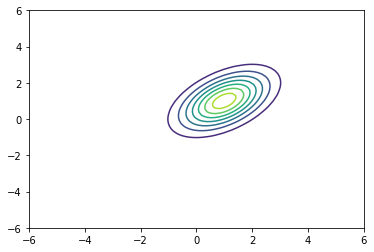

In [6]:
plt.contour(x1s,x2s,pdf_vals)

## Breakout Exercise:
Using the matrix $A$ and variance $\sigma_\epsilon^2$ defined in the following code cell, compute the mean and covariance of $AX + \epsilon$, where $A$ is a matrix, and $\epsilon$ is a vector of Gaussian random variables with mean $0$ and covariance $\sigma_\epsilon^2 I$.
1. Construct the covariance $\sigma_\epsilon^2 I$ (already done).
1. Create a new variable named `sigma2` holding the covariance
1. Create a new variable named `mu2` holding the mean.
1. (Bonus) Construct a function called `GaussianTransform` that returns the transformed mean and covariance.

In [7]:
A = np.array([[1.2,1],
              [0.5, 0.1]])

eps_var = 0.1
eps_cov = eps_var*np.eye(2)


In [8]:
# Put your computations in this cell here...
